# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import requests
import json
import pprint
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import linregress
from api_keys import weather_api_key

## Generate Cities List

In [3]:
# Create empty list
cities = []

# Create random latitude and longitude
city_count = 0

while city_count < 1500:
    lat = np.random.randint(-90,90)
    long = np.random.randint(-180,180)
    
    # Get city names
    city = citipy.nearest_city(lat, long).city_name
    
    # Append lat long to cities without duplicates
    if city not in cities:
        cities.append(city)
    city_count = city_count + 1
print(len(cities))

608


In [4]:
# Testing - Print details about Rome to see responses structure
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = url + "appid=" + weather_api_key + "&q="
city = "rome"
response = requests.get(query_url + city).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34.26,
        "lon": -85.16
    },
    "dt": 1601451729,
    "id": 4219762,
    "main": {
        "feels_like": 282.26,
        "humidity": 87,
        "pressure": 1016,
        "temp": 283.59,
        "temp_max": 284.82,
        "temp_min": 282.59
    },
    "name": "Rome",
    "sys": {
        "country": "US",
        "id": 5680,
        "sunrise": 1601465682,
        "sunset": 1601508362,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 258,
        "speed": 1.37
    }
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
lat = []
lon = []    
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_list = []
count = 0
set = 1
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = url + "appid=" + weather_api_key + "&q="

# Loop through cities to get responses, new loop at 50 responses
for city in cities:
    count = count + 1
    if count > 50:
        count = 1
        set = set + 1
    print(f"Processing Record {count} of Set {set} | {city}")     
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']["lat"])
        lon.append(response['coord']["lon"])
        max_temp.append(response['main']["temp_max"])
        humidity.append(response['main']["humidity"])
        cloudiness.append(response['clouds']["all"])
        wind_speed.append(response['wind']["speed"])
        country.append(response['sys']["country"])
        date.append(response['dt'])
        city_list.append(response['name'])
        

    except KeyError:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | boden
Processing Record 3 of Set 1 | zarate
Processing Record 4 of Set 1 | ballina
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | male
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | tutoia
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | fairbanks
Processing Record 15 of Set 1 | grindavik
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | komsomolskiy
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | tocopilla
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | kilindoni
Processing Record 22 of Set 1 | rungata
City not found. Skipping...
Processing Record 23 of Set 1 | cherskiy
Pro

Processing Record 40 of Set 4 | lubao
Processing Record 41 of Set 4 | san andres
Processing Record 42 of Set 4 | kalundborg
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | bardiyah
Processing Record 45 of Set 4 | basco
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | egvekinot
Processing Record 48 of Set 4 | victoria falls
Processing Record 49 of Set 4 | touros
Processing Record 50 of Set 4 | pandan
Processing Record 1 of Set 5 | petatlan
Processing Record 2 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 5 | zhigansk
Processing Record 4 of Set 5 | eldikan
City not found. Skipping...
Processing Record 5 of Set 5 | alugan
Processing Record 6 of Set 5 | ostersund
Processing Record 7 of Set 5 | merauke
Processing Record 8 of Set 5 | port hardy
Processing Record 9 of Set 5 | mackenzie
Processing Record 10 of Set 5 | kruisfontein
Processing Record 11 of Set 5 | umba
Processing Record 12 of Set 5 | kununurra
P

Processing Record 29 of Set 8 | gat
Processing Record 30 of Set 8 | wamba
Processing Record 31 of Set 8 | la paz
Processing Record 32 of Set 8 | ancud
Processing Record 33 of Set 8 | lasa
Processing Record 34 of Set 8 | buchanan
Processing Record 35 of Set 8 | villa guerrero
Processing Record 36 of Set 8 | novobirilyussy
Processing Record 37 of Set 8 | changli
Processing Record 38 of Set 8 | westpunt
City not found. Skipping...
Processing Record 39 of Set 8 | ahumada
City not found. Skipping...
Processing Record 40 of Set 8 | saleaula
City not found. Skipping...
Processing Record 41 of Set 8 | paracatu
Processing Record 42 of Set 8 | clifton
Processing Record 43 of Set 8 | palaikastron
Processing Record 44 of Set 8 | oussouye
Processing Record 45 of Set 8 | tilichiki
Processing Record 46 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 8 | hokitika
Processing Record 48 of Set 8 | padang
Processing Record 49 of Set 8 | cabedelo
Processing Record 50 of Set

Processing Record 14 of Set 12 | polson
Processing Record 15 of Set 12 | airai
Processing Record 16 of Set 12 | rosendal
Processing Record 17 of Set 12 | corinto
Processing Record 18 of Set 12 | linxia
Processing Record 19 of Set 12 | khonuu
City not found. Skipping...
Processing Record 20 of Set 12 | mae sai
Processing Record 21 of Set 12 | harper
Processing Record 22 of Set 12 | ler
Processing Record 23 of Set 12 | tongzi
Processing Record 24 of Set 12 | izamal
Processing Record 25 of Set 12 | brigantine
Processing Record 26 of Set 12 | lata
Processing Record 27 of Set 12 | jacareacanga
Processing Record 28 of Set 12 | baculin
Processing Record 29 of Set 12 | bandarbeyla
Processing Record 30 of Set 12 | veshkayma
Processing Record 31 of Set 12 | anadyr
Processing Record 32 of Set 12 | gladstone
Processing Record 33 of Set 12 | andrushivka
Processing Record 34 of Set 12 | awbari
Processing Record 35 of Set 12 | fort myers beach
Processing Record 36 of Set 12 | luwuk
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictionary
dictionary = {
    "City": city_list,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date}
df = pd.DataFrame(dictionary)
# Export city data to a .csv
df.to_csv("city_data.csv")
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,289.82,54,92,0.89,ZA,1601451903
1,Boden,65.83,21.69,282.15,100,90,2.10,SE,1601451904
2,Zárate,-34.10,-59.03,287.59,85,0,1.82,AR,1601451904
3,Ballina,-28.87,153.57,293.15,59,40,3.60,AU,1601451904
4,Jamestown,42.10,-79.24,283.71,100,90,2.60,US,1601451904


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Filter dataframe to only include cities with humidity less than 100
clean_city_data = df.loc[df["Humidity"] < 100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,289.82,54,92,0.89,ZA,1601451903
2,Zárate,-34.10,-59.03,287.59,85,0,1.82,AR,1601451904
3,Ballina,-28.87,153.57,293.15,59,40,3.60,AU,1601451904
5,Clyde River,70.47,-68.59,271.15,92,90,2.10,CA,1601451905
6,Malé,4.17,73.51,304.15,74,75,3.60,MV,1601451738


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

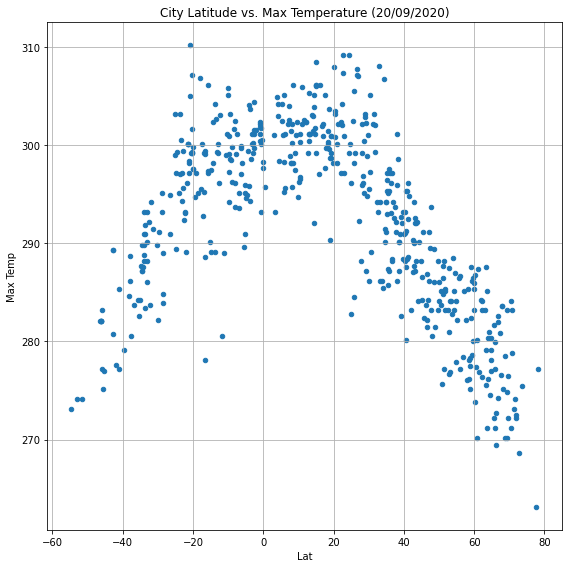

In [8]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8), title="City Latitude vs. Max Temperature (20/09/2020)")
plt.tight_layout()
plt.savefig("Images/LatVsTemp.png")

## Latitude vs. Humidity Plot

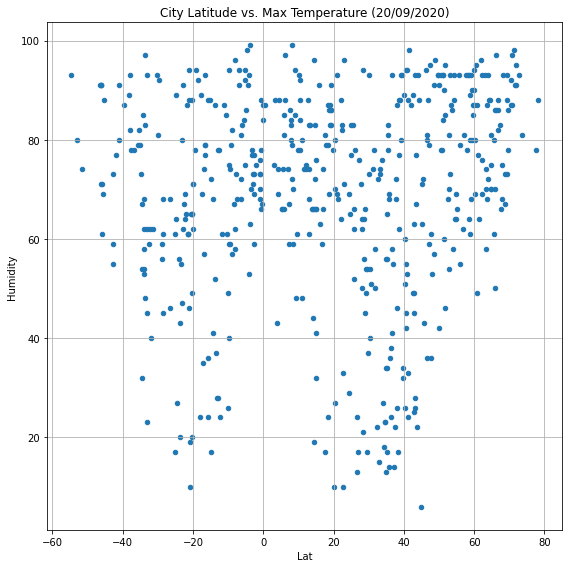

In [9]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8), title="City Latitude vs. Max Temperature (20/09/2020)")
plt.tight_layout()
plt.savefig("Images/LatVsHumidity.png")

## Latitude vs. Cloudiness Plot

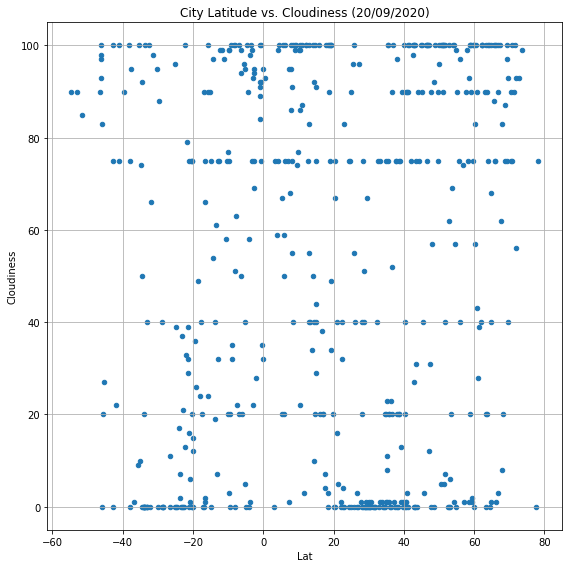

In [10]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8), title="City Latitude vs. Cloudiness (20/09/2020)")
plt.tight_layout()
plt.savefig("Images/LatVsCloudiness.png")

## Latitude vs. Wind Speed Plot

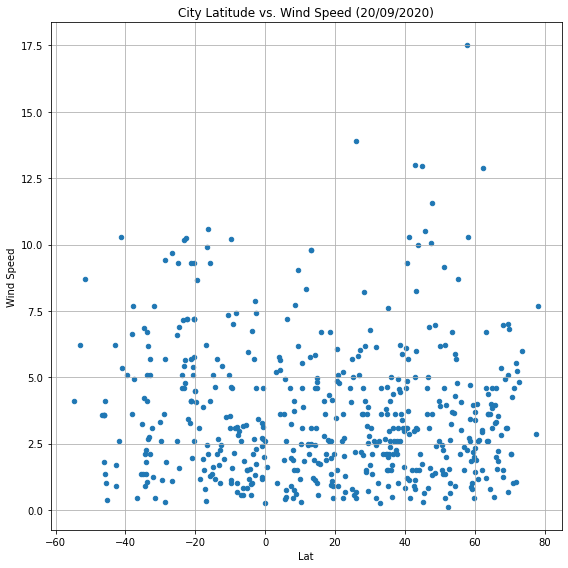

In [11]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8), title="City Latitude vs. Wind Speed (20/09/2020)")
plt.tight_layout()
plt.savefig("Images/LatVsWindSpeed.png")

## Linear Regression

In [12]:
# Create DataFrames for each Northern and Southern Hemisphere 
northern_df = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_df = clean_city_data.loc[clean_city_data["Lat"] < 0]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,Clyde River,70.47,-68.59,271.15,92,90,2.10,CA,1601451905
6,Malé,4.17,73.51,304.15,74,75,3.60,MV,1601451738
9,Kapaa,22.08,-159.32,297.15,88,1,2.60,US,1601451906
10,Albany,42.60,-73.97,287.04,89,100,0.89,US,1601451906
11,Butaritari,3.07,172.79,301.06,75,0,5.21,KI,1601451906


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression model is y = -0.44x + 307.47
The r-squared is: 0.752979779485371


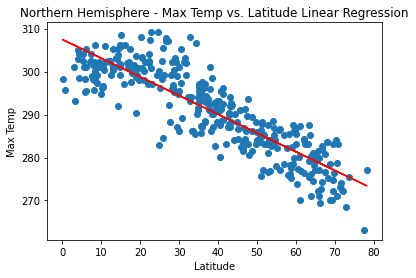

<Figure size 432x288 with 0 Axes>

In [13]:
# Northern Hemisphere
# Linear regression model for Max Temp vs. Latitude 
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("Images/RegressionLatVsTempNorth.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression model is y = 0.43x + 302.87
The r-squared is: 0.5623441424534427


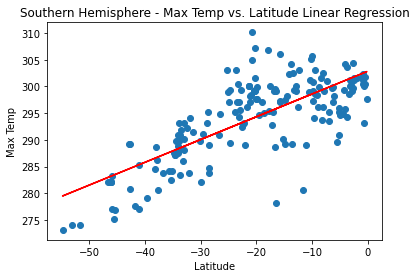

<Figure size 432x288 with 0 Axes>

In [14]:
# Southern Hemisphere
# Linear regression model for Max Temp vs. Latitude 
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("Images/RegressionLatVsTempSouth.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression model is y = 0.19x + 61.44
The r-squared is: 0.029425038263024436


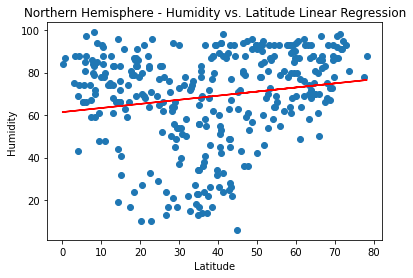

<Figure size 432x288 with 0 Axes>

In [15]:
# Northern Hemisphere
# Linear regression model for Humidity vs. Latitude 
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("Images/RegressionLatVsHumidityNorth.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression model is y = -0.01x + 67.92
The r-squared is: 1.248519694415171e-05


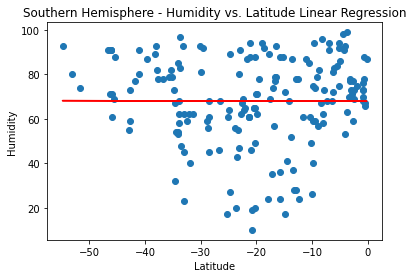

<Figure size 432x288 with 0 Axes>

In [16]:
# Southern Hemisphere
# Linear regression model for Humidity vs. Latitude 
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("Images/RegressionLatVsHumiditySouth.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression model is y = 0.2x + 46.41
The r-squared is: 0.009248613690613033


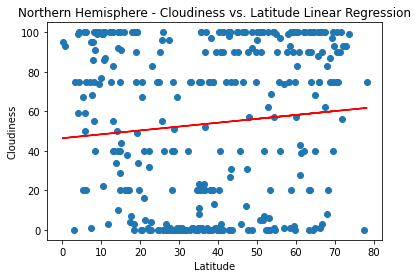

<Figure size 432x288 with 0 Axes>

In [17]:
# Northern Hemisphere
# Linear regression model for Cloudiness vs. Latitude 
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("Images/RegressionLatVsCloudNorth.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression model is y = 0.37x + 55.49
The r-squared is: 0.016474185398971938


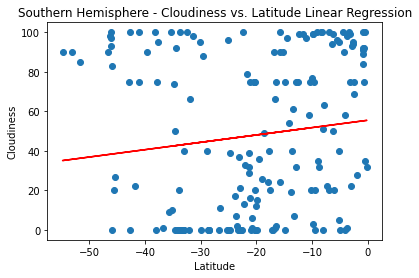

<Figure size 432x288 with 0 Axes>

In [18]:
# Southern Hemisphere
# Linear regression model for Cloudiness vs. Latitude 
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("Images/RegressionLatVsCloudSouth.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression model is y = 0.01x + 3.13
The r-squared is: 0.004557291171614241


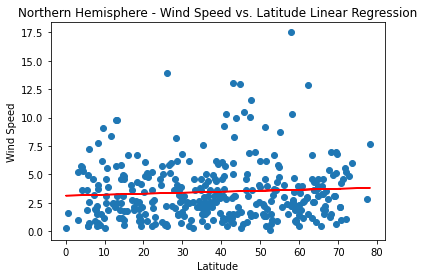

<Figure size 432x288 with 0 Axes>

In [19]:
# Northern Hemisphere
# Linear regression model for Wind Speed vs. Latitude 
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()
plt.savefig("Images/RegressionLatVsWindNorth.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression model is y = -0.03x + 3.34
The r-squared is: 0.01751539303222555


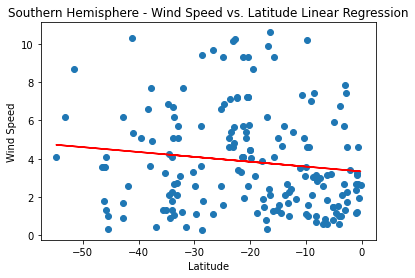

<Figure size 432x288 with 0 Axes>

In [20]:
# Southern Hemisphere
# Linear regression model for Wind Speed vs. Latitude 
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()
plt.savefig("Images/RegressionLatVsWindSouth.png")